In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [10]:
data, test, train, movies = pd.read_csv("data/data.csv"), pd.read_csv("data/test.csv"), pd.read_csv("data/train.csv"), pd.read_csv("data/movies.csv")


In [11]:
def gen_rating_freq_hist(df, title, filename):
    counts = df.Rating.value_counts()
    plt.bar(counts.index, counts.values)
    plt.xticks(np.arange(1,6))
    plt.title(title)
    plt.xlabel("rating")
    plt.ylabel("frequency")
    plt.savefig("./plots/" + filename + ".png")
    plt.show()
    

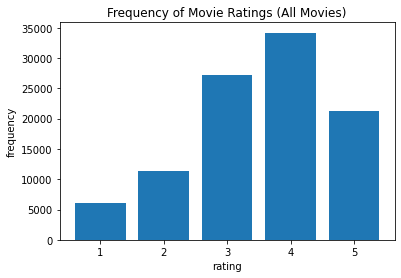

In [12]:
gen_rating_freq_hist(data, "Frequency of Movie Ratings (All Movies)", "1a")

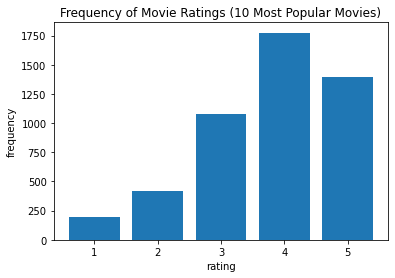

In [13]:
ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").count().rename(columns={"Rating":"Count"})
s = ratings.sort_values("Count")
popular_10_movies = s[-10:].index.array
popular_10_movies

popular_ratings = data[data["Movie ID"].isin(popular_10_movies)]
gen_rating_freq_hist(popular_ratings, "Frequency of Movie Ratings (10 Most Popular Movies)", "1b")

In [ ]:
ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").mean()
s = ratings.sort_values("Rating")
best_10_movies = s[-10:].index.array

popular_ratings = data[data["Movie ID"].isin(best_10_movies)]
gen_rating_freq_hist(popular_ratings, "Frequency of Movie Ratings (10 Most Popular Movies)", "1b")

In [39]:
ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").mean()
s = ratings.sort_values("Rating")
best_10_movies = s[-10:]


counts_best_10 = data[data["Movie ID"].isin(best_10_movies.index)].groupby(["Movie ID", "Rating"]).count().rename(columns={"Rating":"Count"})
counts_best_10

# gen_rating_freq_hist(counts_best_10, "Average of Movie Ratings (10 Best Movies)", "1c")


counts_best_10

# counts = counts_best_10["Rating"].value_counts()
# counts_best_10

# plt.bar(counts.index, counts.values)
# plt.xticks(np.arange(1,6))
# plt.xlabel("rating")
# plt.ylabel("frequency")
# plt.savefig("./plots/" + filename + ".png")
# plt.show()


,,User ID
Movie ID,Rating,
814,5,1
1122,5,1
1189,5,3
1201,5,1
1293,5,3
1467,5,2
1500,5,2
1536,5,1
1599,5,1


In [ ]:
genres = ["Action", "Comedy", "Childrens"]

for genre in genres:
    ids_in_genre = movies[movies[genre] == 1]["Movie ID"]
    ratings_in_genre = data[data["Movie ID"].isin(ids_in_genre)]
    gen_rating_freq_hist(ratings_in_genre, "Movie Ratings ({})".format(genre), "1d_{}".format(genre.lower()))
    